## Mid term exam - Text Based Analysis
## Text Analytics, Social Media Scrapping
### Ramya , SHU ID 0935993


#### Data Collection from the web
Data can be collected using APIs, typically for social media 

Data can be “Scrapped” from any website (using scrapy andRegularexpressions

## Authentication

In [1]:
#!pip install praw

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"cancer"** subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("cancer").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Welcome to /R/Cancer, sorry you're here. Please read our sidebar before submitting any posts!
134rb4s
Torlin
1682958742.0
124
1.0
https://www.reddit.com/r/cancer/comments/134rb4s/welcome_to_rcancer_sorry_youre_here_please_read/
0


**Get total comment in Subreddit**

In [5]:
headlines = set()
for submission in reddit.subreddit("cancer").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

719


## Creating Cancer Database

In [6]:
cancer_df = pd.DataFrame(headlines)
cancer_df.head()

,0
0,My Mom Has Stage 4 Gallbladder Cancer; Has Opt...
1,Hospice
2,Product for extremely dry skin while hospitali...
3,Exploring Immunotherapy Options for Stage 3 Cl...
4,Anyone had a Thoracic Surgery Via VATS?


## Displaying Rows of a Dataframe

In [7]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Cancer DataFrame
cancer_df.head()

,0
0,My Mom Has Stage 4 Gallbladder Cancer; Has Opt...
1,Hospice
2,Product for extremely dry skin while hospitali...
3,Exploring Immunotherapy Options for Stage 3 Cl...
4,Anyone had a Thoracic Surgery Via VATS?


## Displaying the columns

In [8]:
# Display the column names of the Cancer DataFrame
cancer_df.columns

RangeIndex(start=0, stop=1, step=1)

## Renaming the column of the Cancer Dataframe

In [9]:
# Renaming the column of the Cancer DataFrame to 'Titles' and displaying the first few rows
cancer_df.columns = ['Titles']
cancer_df.head()

,Titles
0,My Mom Has Stage 4 Gallbladder Cancer; Has Opt...
1,Hospice
2,Product for extremely dry skin while hospitali...
3,Exploring Immunotherapy Options for Stage 3 Cl...
4,Anyone had a Thoracic Surgery Via VATS?


## Datatypes of the Cancer dataset

In [10]:
# df.dtypes returns data types of the data frame
cancer_df.dtypes

Titles    object
dtype: object

## Display information

In [11]:
#df.info returns concise summary of a DataFrame
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titles  719 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


## Display Descriptive

In [12]:
#The df.describe() method in pandas is used to generate descriptive statistics of the central tendency, dispersion, and shape of a DataFrame's distribution, excluding NaN values
cancer_df.describe()

,Titles
count,719
unique,719
top,My Mom Has Stage 4 Gallbladder Cancer; Has Opt...
freq,1


## Adding a new columb to the dataframe 

In [13]:
#Let’s add a new column with the length of the “text” column
#df['text']: Selects the 'text' column from the DataFrame.
#.str.len(): Applies the len() function to each element in the 'text' column, returning the length of each string.
#df['length'] = ...: Creates a new column named 'length' in the DataFrame and assigns the calculated lengths to this column

cancer_df['length'] = cancer_df['Titles'].str.len()
cancer_df.describe()

,length
count,719.000000
mean,38.852573
std,30.177155
min,4.000000
25%,20.000000
50%,31.000000
75%,49.000000
max,288.000000


## Display Dataframe Information

In [14]:
#The df.describe(include='O') output will show statistics for each object (string) column in your DataFrame.
cancer_df.describe(include='O')

,Titles
count,719
unique,719
top,My Mom Has Stage 4 Gallbladder Cancer; Has Opt...
freq,1


## Checking for duplicate titles in the Cancer DataFrame

In [16]:
# Checking for duplicate titles in the Cancer DataFrame and counting the occurrences
cancer_df.Titles.duplicated().sum() 

0

## Finding a missing values of Dataframe

In [17]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
cancer_df.isna().sum()

Titles    0
length    0
dtype: int64

## to Uppercase

In [18]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'speaker' column to uppercase.


cancer_df['Titles'] = cancer_df['Titles'].str.upper()
print (cancer_df)

                                                Titles  length
0    MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...      61
1                                              HOSPICE       7
2    PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...      50
3    EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...      75
4              ANYONE HAD A THORACIC SURGERY VIA VATS?      39
..                                                 ...     ...
714  COPING WITH FEELING LIKE A BURDEN AND IDEAS FO...      69
715  FACING THE END OF MARRIAGE WHILE GOING THROUGH...      54
716                   TOLERABLE FOODS FOR MOUTH SORES?      32
717                        THROAT CANCER AND DYSPHAGIA      27
718  HELP APPEALING PROTON THERAPY DENIAL WITH INSU...      52

[719 rows x 2 columns]


## Cleaning the text

In [19]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
cancer_df["Titles"]= cancer_df["Titles"].apply(cleanTxt)

#Show the clean text
cancer_df.head()

,Titles,length
0,MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...,61
1,HOSPICE,7
2,PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...,50
3,EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...,75
4,ANYONE HAD A THORACIC SURGERY VIA VATS?,39


## Removing Emoji and Unique 

In [20]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
cancer_df["Titles"]= cancer_df["Titles"].apply(remove_emoji)

#Show the clean text
cancer_df.head()

,Titles,length
0,MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...,61
1,HOSPICE,7
2,PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...,50
3,EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...,75
4,ANYONE HAD A THORACIC SURGERY VIA VATS?,39


### Plotting charts

Text(0.5, 1.0, 'Line Plot of Length Column')

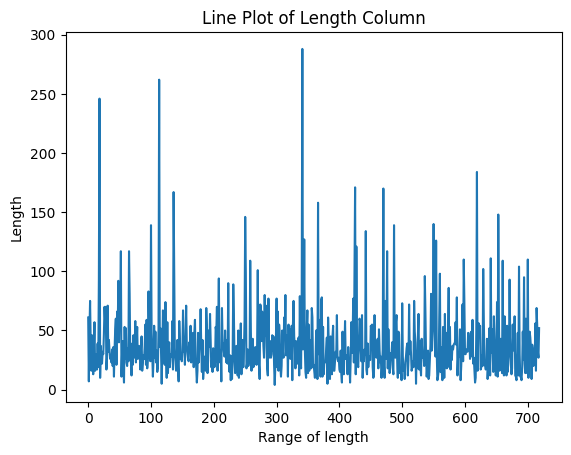

In [23]:
#df['length'].plot(): This creates a line plot for the 'length' column. The x-axis will likely represent the index of the DataFrame, and the y-axis will represent the values in the 'length' column.
#df['length'].plot(kind='box', vert=False): This creates a horizontal box plot for the 'length' column. Box plots provide a visual summary of the distribution of data, including the median, quartiles, and potential outliers.

!pip install matplotlib

import matplotlib.pyplot as plt
cancer_df['length'].plot()
plt.xlabel('Range of length') 
plt.ylabel('Length')
plt.title('Line Plot of Length Column') 

### Boxplot

Text(0.5, 1.0, 'Box Plot of Length Column')

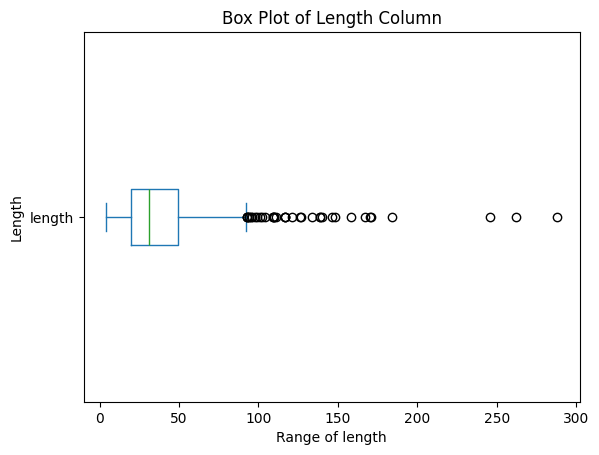

In [24]:
cancer_df['length'].plot(kind='box', vert=False)
plt.xlabel('Range of length')
plt.ylabel('Length') 
plt.title('Box Plot of Length Column') 

### Histogram

Text(0.5, 1.0, 'Histogram of Length Column')

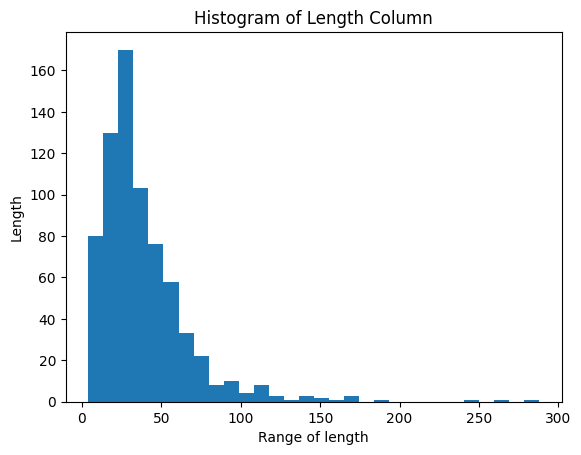

In [25]:
#df['length'].plot(kind='hist', bins=30): This creates a histogram for the 'length' column with 30 bins. The x-axis represents the range of 'length' values, and the y-axis represents the frequency or count of values within each bin.

cancer_df['length'].plot(kind='hist', bins=30)
plt.xlabel('Range of length')  
plt.ylabel('Length')  
plt.title('Histogram of Length Column') 

### REGEX TO PULL OUT WORDS

In [26]:
!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


cancer_df['tokenized_Titles'] = cancer_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(cancer_df[['Titles', 'tokenized_Titles']].head())


                                              Titles  \
0  MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...   
1                                            HOSPICE   
2  PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...   
3  EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...   
4            ANYONE HAD A THORACIC SURGERY VIA VATS?   

                                    tokenized_Titles  
0  [MY, MOM, HAS, STAGE, GALLBLADDER, CANCER, HAS...  
1                                          [HOSPICE]  
2  [PRODUCT, FOR, EXTREMELY, DRY, SKIN, WHILE, HO...  
3  [EXPLORING, IMMUNOTHERAPY, OPTIONS, FOR, STAGE...  
4     [ANYONE, HAD, A, THORACIC, SURGERY, VIA, VATS]  


## Remove Stop words

In [27]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
cancer_df['clean_tokens'] = cancer_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(cancer_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakkerar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
714  COPING WITH FEELING LIKE A BURDEN AND IDEAS FO...   
715  FACING THE END OF MARRIAGE WHILE GOING THROUGH...   
716                   TOLERABLE FOODS FOR MOUTH SORES?   
717                        THROAT CANCER AND DYSPHAGIA   
718  HELP APPEALING PROTON THERAPY DENIAL WITH INSU...   

                                          clean_tokens  
714  [COPING, FEELING, LIKE, BURDEN, IDEAS, GIVING,...  
715          [FACING, END, MARRIAGE, GOING, CANCER, .]  
716                [TOLERABLE, FOODS, MOUTH, SORES, ?]  
717                        [THROAT, CANCER, DYSPHAGIA]  
718  [HELP, APPEALING, PROTON, THERAPY, DENIAL, INS...  


## Function to tokenize

In [28]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
cancer_df['tokenized_Titles'] = cancer_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(cancer_df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0  MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...   
1                                            HOSPICE   
2  PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...   
3  EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...   
4            ANYONE HAD A THORACIC SURGERY VIA VATS?   

                                    tokenized_Titles  
0  [MY, MOM, HAS, STAGE, GALLBLADDER, CANCER, HAS...  
1                                          [HOSPICE]  
2  [PRODUCT, FOR, EXTREMELY, DRY, SKIN, WHILE, HO...  
3  [EXPLORING, IMMUNOTHERAPY, OPTIONS, FOR, STAGE...  
4     [ANYONE, HAD, A, THORACIC, SURGERY, VIA, VATS]  


## Stopwords from Dataset

In [29]:
!pip install nltk

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Display the DataFrame
print(cancer_df.head())  

{'just', 'we', 'her', 'some', 'same', 'until', 'yourselves', 'does', 'your', 'herself', 'and', 'here', 'who', 'isn', "shouldn't", 'between', 'about', 'which', 'after', "you're", 'been', "needn't", 'will', 'at', 'a', 'should', 'it', "haven't", 'during', 'such', 'did', 'over', 'm', 'am', "you've", 'o', 'ours', 'y', 'shan', 'having', 'because', 'most', "it's", 'wouldn', 'that', 'with', 'won', 'this', 'ain', 'be', 'now', 'mightn', 'while', 'yourself', 'have', 'own', 'but', 'through', 'itself', 'are', "mightn't", 'shouldn', 'more', 'our', 'is', 'in', "isn't", 'nor', 'those', "didn't", 'only', 'out', 'didn', 'can', 'above', 'down', 'any', 'being', 'll', 'into', 'against', 'haven', 'wasn', 'had', 'hasn', 'i', "hasn't", 'hadn', 'has', 'themselves', "you'll", 'what', 'needn', 'there', "you'd", "wasn't", "won't", "hadn't", 'these', 'hers', "weren't", 'very', 'was', 'all', "should've", 'of', 'to', 'so', "wouldn't", 'yours', 'under', 'by', 't', "don't", 'where', 've', 'him', 'she', 'they', 'them',

## Removing Stopwords

In [30]:
#function to remove stop words
import pandas as pd
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
cancer_df['cleantokens'] = cancer_df['Titles'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(cancer_df[['Titles', 'cleantokens']].tail())

                                                Titles  \
714  COPING WITH FEELING LIKE A BURDEN AND IDEAS FO...   
715  FACING THE END OF MARRIAGE WHILE GOING THROUGH...   
716                   TOLERABLE FOODS FOR MOUTH SORES?   
717                        THROAT CANCER AND DYSPHAGIA   
718  HELP APPEALING PROTON THERAPY DENIAL WITH INSU...   

                                           cleantokens  
714  [COPING, FEELING, LIKE, BURDEN, IDEAS, GIVING,...  
715            [FACING, END, MARRIAGE, GOING, CANCER.]  
716                  [TOLERABLE, FOODS, MOUTH, SORES?]  
717                        [THROAT, CANCER, DYSPHAGIA]  
718  [HELP, APPEALING, PROTON, THERAPY, DENIAL, INS...  


##  Pipeline

In [31]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


cancer_df['processed_Titles'] = cancer_df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(cancer_df[['Titles', 'processed_Titles']].tail())

                                                Titles  \
714  COPING WITH FEELING LIKE A BURDEN AND IDEAS FO...   
715  FACING THE END OF MARRIAGE WHILE GOING THROUGH...   
716                   TOLERABLE FOODS FOR MOUTH SORES?   
717                        THROAT CANCER AND DYSPHAGIA   
718  HELP APPEALING PROTON THERAPY DENIAL WITH INSU...   

                                      processed_Titles  
714  [coping, feeling, like, burden, ideas, giving,...  
715             [facing, end, marriage, going, cancer]  
716                   [tolerable, foods, mouth, sores]  
717                        [throat, cancer, dysphagia]  
718  [help, appealing, proton, therapy, denial, ins...  


## Run the Pipeline

In [32]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


cancer_df['tokens'] = cancer_df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(cancer_df[['Titles', 'tokens']].head())


                                              Titles  \
0  MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...   
1                                            HOSPICE   
2  PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...   
3  EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...   
4            ANYONE HAD A THORACIC SURGERY VIA VATS?   

                                              tokens  
0  [mom, stage, 4, gallbladder, cancer, opted, ho...  
1                                          [hospice]  
2      [product, extremely, dry, skin, hospitalized]  
3  [exploring, immunotherapy, options, stage, 3, ...  
4             [anyone, thoracic, surgery, via, vats]  


## Counting the Tokens

In [33]:
#count the tokens
cancer_df['num_tokens'] = cancer_df['tokens'].map(len)
cancer_df.tail()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens
714,COPING WITH FEELING LIKE A BURDEN AND IDEAS FO...,69,"[COPING, WITH, FEELING, LIKE, A, BURDEN, AND, ...","[COPING, FEELING, LIKE, BURDEN, IDEAS, GIVING,...","[COPING, FEELING, LIKE, BURDEN, IDEAS, GIVING,...","[coping, feeling, like, burden, ideas, giving,...","[coping, feeling, like, burden, ideas, giving,...",8
715,FACING THE END OF MARRIAGE WHILE GOING THROUGH...,54,"[FACING, THE, END, OF, MARRIAGE, WHILE, GOING,...","[FACING, END, MARRIAGE, GOING, CANCER, .]","[FACING, END, MARRIAGE, GOING, CANCER.]","[facing, end, marriage, going, cancer]","[facing, end, marriage, going, cancer]",5
716,TOLERABLE FOODS FOR MOUTH SORES?,32,"[TOLERABLE, FOODS, FOR, MOUTH, SORES]","[TOLERABLE, FOODS, MOUTH, SORES, ?]","[TOLERABLE, FOODS, MOUTH, SORES?]","[tolerable, foods, mouth, sores]","[tolerable, foods, mouth, sores]",4
717,THROAT CANCER AND DYSPHAGIA,27,"[THROAT, CANCER, AND, DYSPHAGIA]","[THROAT, CANCER, DYSPHAGIA]","[THROAT, CANCER, DYSPHAGIA]","[throat, cancer, dysphagia]","[throat, cancer, dysphagia]",3
718,HELP APPEALING PROTON THERAPY DENIAL WITH INSU...,52,"[HELP, APPEALING, PROTON, THERAPY, DENIAL, WIT...","[HELP, APPEALING, PROTON, THERAPY, DENIAL, INS...","[HELP, APPEALING, PROTON, THERAPY, DENIAL, INS...","[help, appealing, proton, therapy, denial, ins...","[help, appealing, proton, therapy, denial, ins...",6


### Word Frequency Analysis

In [35]:
#Let’s count
from collections import Counter
counter = Counter()
cancer_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('cancer', 172), ('chemo', 66), ('treatment', 36), ('stage', 34), ('diagnosed', 33)]


## Frequency of Dataframe words

In [36]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_Cancer_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_Cancer_df = freq_Cancer_df.query('freq >= 1')
freq_Cancer_df.index.name = 'token'
print(freq_Cancer_df)

             freq
token            
mom            16
stage          34
4              19
gallbladder     3
cancer        172
...           ...
marriage        1
tolerable       1
dysphagia       1
appealing       1
denial          1

[1334 rows x 1 columns]


## Sort and Display

In [37]:
#Lets sort and display

freq_Cancer_df = freq_Cancer_df.sort_values('freq', ascending=False)
freq_Cancer_df.head(15)

,freq
token,
cancer,172
chemo,66
treatment,36
stage,34
diagnosed,33
anyone,26
surgery,25
help,25
need,22


## Finding Information of Frequency

In [38]:
freq_Cancer_df.describe()

,freq
count,1334.000000
mean,2.289355
std,5.769407
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,172.000000


## Bar chat

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

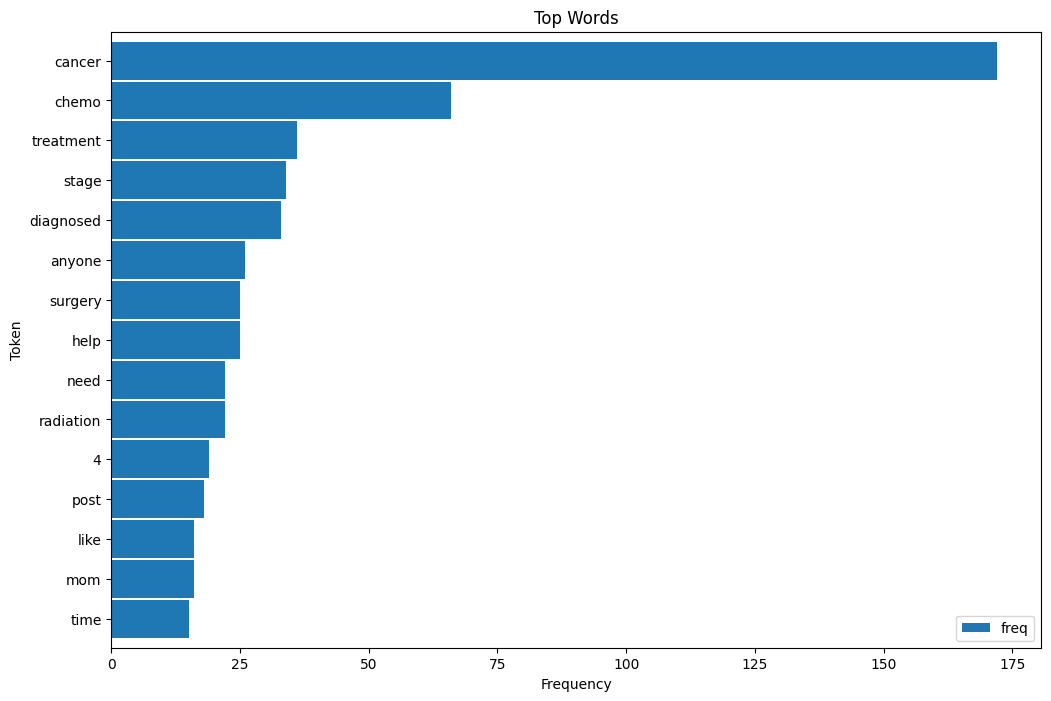

In [39]:
#Bar chart 

ax = freq_Cancer_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Sentiment Analysis Of Cancer

In [40]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cancer_df['Subjectivity'] = cancer_df['Titles'].apply(getSubjectivity)
cancer_df['Polarity'] = cancer_df['Titles'].apply(getPolarity)

#Now display data
cancer_df.head()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity
0,MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...,61,"[MY, MOM, HAS, STAGE, GALLBLADDER, CANCER, HAS...","[MOM, STAGE, 4, GALLBLADDER, CANCER, ;, OPTED,...","[MOM, STAGE, 4, GALLBLADDER, CANCER;, OPTED, H...","[mom, stage, 4, gallbladder, cancer, opted, ho...","[mom, stage, 4, gallbladder, cancer, opted, ho...",7,0.000000,0.000000
1,HOSPICE,7,[HOSPICE],[HOSPICE],[HOSPICE],[hospice],[hospice],1,0.000000,0.000000
2,PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...,50,"[PRODUCT, FOR, EXTREMELY, DRY, SKIN, WHILE, HO...","[PRODUCT, EXTREMELY, DRY, SKIN, HOSPITALIZED, ?]","[PRODUCT, EXTREMELY, DRY, SKIN, HOSPITALIZED?]","[product, extremely, dry, skin, hospitalized]","[product, extremely, dry, skin, hospitalized]",5,0.600000,-0.066667
3,EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...,75,"[EXPLORING, IMMUNOTHERAPY, OPTIONS, FOR, STAGE...","[EXPLORING, IMMUNOTHERAPY, OPTIONS, STAGE, 3, ...","[EXPLORING, IMMUNOTHERAPY, OPTIONS, STAGE, 3, ...","[exploring, immunotherapy, options, stage, 3, ...","[exploring, immunotherapy, options, stage, 3, ...",10,0.383333,0.100000
4,ANYONE HAD A THORACIC SURGERY VIA VATS?,39,"[ANYONE, HAD, A, THORACIC, SURGERY, VIA, VATS]","[ANYONE, THORACIC, SURGERY, VIA, VATS, ?]","[ANYONE, THORACIC, SURGERY, VIA, VATS?]","[anyone, thoracic, surgery, via, vats]","[anyone, thoracic, surgery, via, vats]",5,0.000000,0.000000


## Categorizing Cancer REDDIT POSTS

In [41]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
cancer_df["Insight"] = cancer_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
cancer_df.head(20)

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...,61,"[MY, MOM, HAS, STAGE, GALLBLADDER, CANCER, HAS...","[MOM, STAGE, 4, GALLBLADDER, CANCER, ;, OPTED,...","[MOM, STAGE, 4, GALLBLADDER, CANCER;, OPTED, H...","[mom, stage, 4, gallbladder, cancer, opted, ho...","[mom, stage, 4, gallbladder, cancer, opted, ho...",7,0.000000,0.000000,Neutral
1,HOSPICE,7,[HOSPICE],[HOSPICE],[HOSPICE],[hospice],[hospice],1,0.000000,0.000000,Neutral
2,PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...,50,"[PRODUCT, FOR, EXTREMELY, DRY, SKIN, WHILE, HO...","[PRODUCT, EXTREMELY, DRY, SKIN, HOSPITALIZED, ?]","[PRODUCT, EXTREMELY, DRY, SKIN, HOSPITALIZED?]","[product, extremely, dry, skin, hospitalized]","[product, extremely, dry, skin, hospitalized]",5,0.600000,-0.066667,Negative
3,EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...,75,"[EXPLORING, IMMUNOTHERAPY, OPTIONS, FOR, STAGE...","[EXPLORING, IMMUNOTHERAPY, OPTIONS, STAGE, 3, ...","[EXPLORING, IMMUNOTHERAPY, OPTIONS, STAGE, 3, ...","[exploring, immunotherapy, options, stage, 3, ...","[exploring, immunotherapy, options, stage, 3, ...",10,0.383333,0.100000,Positive
4,ANYONE HAD A THORACIC SURGERY VIA VATS?,39,"[ANYONE, HAD, A, THORACIC, SURGERY, VIA, VATS]","[ANYONE, THORACIC, SURGERY, VIA, VATS, ?]","[ANYONE, THORACIC, SURGERY, VIA, VATS?]","[anyone, thoracic, surgery, via, vats]","[anyone, thoracic, surgery, via, vats]",5,0.000000,0.000000,Neutral
5,WHEN TO GIVE UP?,16,"[WHEN, TO, GIVE, UP]","[GIVE, ?]","[GIVE, UP?]",[give],[give],1,0.000000,0.000000,Neutral
6,IDEAS TO CELEBRATE THE END OF CHEMO TREATMENT?,46,"[IDEAS, TO, CELEBRATE, THE, END, OF, CHEMO, TR...","[IDEAS, CELEBRATE, END, CHEMO, TREATMENT, ?]","[IDEAS, CELEBRATE, END, CHEMO, TREATMENT?]","[ideas, celebrate, end, chemo, treatment]","[ideas, celebrate, end, chemo, treatment]",5,0.000000,0.000000,Neutral
7,ANAL CANCER FOUND OUT YESTERDAY,31,"[ANAL, CANCER, FOUND, OUT, YESTERDAY]","[ANAL, CANCER, FOUND, YESTERDAY]","[ANAL, CANCER, FOUND, YESTERDAY]","[anal, cancer, found, yesterday]","[anal, cancer, found, yesterday]",4,0.000000,0.000000,Neutral
8,MISSED SIGNS?,13,"[MISSED, SIGNS]","[MISSED, SIGNS, ?]","[MISSED, SIGNS?]","[missed, signs]","[missed, signs]",2,0.000000,0.000000,Neutral
9,PSEUDOPROGRESSION ON KEYTRUDA/LENVIMA,37,"[PSEUDOPROGRESSION, ON, KEYTRUDA, LENVIMA]","[PSEUDOPROGRESSION, KEYTRUDA/LENVIMA]","[PSEUDOPROGRESSION, KEYTRUDA/LENVIMA]","[pseudoprogression, keytruda, lenvima]","[pseudoprogression, keytruda, lenvima]",3,0.000000,0.000000,Neutral


## Data Visualization

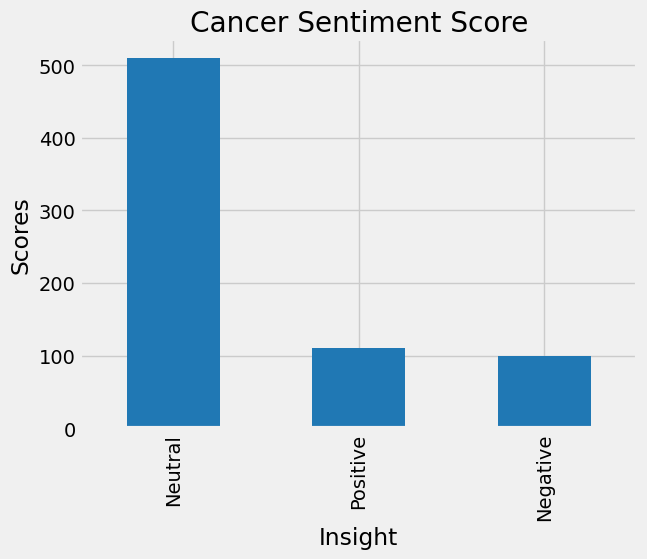

In [42]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Cancer Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cancer_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Exploring Sentiment Lexicon and Tokenizing of Dataset

In [43]:
# Install scikit-learn library
!pip install scikit-learn
# Install NLTK library 
!pip install nltk

# Import necessary modules from scikit-learn and NLTK libraries
from sklearn import preprocessing
import nltk

# Import the opinion lexicon corpus from NLTK
from nltk.corpus import opinion_lexicon
# Import the word_tokenize function from NLTK, which is used for tokenization
from nltk.tokenize import word_tokenize


# Print the total number of words in the opinion lexicon dataset
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
# Print examples of positive words from the opinion lexicon dataset
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
# Print examples of negative words from the opinion lexicon dataset
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## Constructing Sentiment Scoring Dictionary of Dataset

In [44]:
# Let's create a dictionary which we can use for scoring our review titles

cancer_df.rename(columns={"reviewTitles": "Titles"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
    
#Printing a dictionary
print(word_dict)

{'a+': 1, 'abound': 1, 'abounds': 1, 'abundance': 1, 'abundant': 1, 'accessable': 1, 'accessible': 1, 'acclaim': 1, 'acclaimed': 1, 'acclamation': 1, 'accolade': 1, 'accolades': 1, 'accommodative': 1, 'accomodative': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'accomplishments': 1, 'accurate': 1, 'accurately': 1, 'achievable': 1, 'achievement': 1, 'achievements': 1, 'achievible': 1, 'acumen': 1, 'adaptable': 1, 'adaptive': 1, 'adequate': 1, 'adjustable': 1, 'admirable': 1, 'admirably': 1, 'admiration': 1, 'admire': 1, 'admirer': 1, 'admiring': 1, 'admiringly': 1, 'adorable': 1, 'adore': 1, 'adored': 1, 'adorer': 1, 'adoring': 1, 'adoringly': 1, 'adroit': 1, 'adroitly': 1, 'adulate': 1, 'adulation': 1, 'adulatory': 1, 'advanced': 1, 'advantage': 1, 'advantageous': 1, 'advantageously': 1, 'advantages': 1, 'adventuresome': 1, 'adventurous': 1, 'advocate': 1, 'advocated': 1, 'advocates': 1, 'affability': 1, 'affable': 1, 'affably': 1, 'affectation': 1, 'affection': 1, 'affe

## Calculating Bing LIU Sentiment Score for Text

In [45]:
def bing_liu_score(Titles):
    # Initialize the sentiment score variable
    sentiment_score = 0
    
    # Tokenize the input text into words and convert them to lowercase
    bag_of_words = word_tokenize(Titles.lower())
    
    # Iterate through each word in the tokenized text
    for word in bag_of_words:
        # Check if the word exists in the sentiment dictionary
        if word in word_dict:
            # If the word exists, add its sentiment score to the overall sentiment score
            sentiment_score += word_dict[word]
    
    # Return the calculated sentiment score for the input text
    return sentiment_score
Titles = " I love you."
score = bing_liu_score(Titles)
print("Sentiment Score:", score)

Sentiment Score: 1


## Applying BING LIU Sentiment Analyis

In [47]:
# Fill any missing values in the 'text' column of the DataFrame df with the string 'no review'
cancer_df['Titles'] = cancer_df['Titles'].fillna('unknown')

# Apply the bing_liu_score function to each entry in the 'text' column and store the result in a new column named 'Bing_Liu_Score'
cancer_df['Bing_Liu_Score'] = cancer_df['Titles'].apply(bing_liu_score)

#display only the columns 'overall', 'text', and 'Bing_Liu_Score'
cancer_df[["Titles", 'Bing_Liu_Score']].head(15)

,Titles,Bing_Liu_Score
0,MY MOM HAS STAGE 4 GALLBLADDER CANCER; HAS OPT...,-1
1,HOSPICE,0
2,PRODUCT FOR EXTREMELY DRY SKIN WHILE HOSPITALI...,0
3,EXPLORING IMMUNOTHERAPY OPTIONS FOR STAGE 3 CL...,1
4,ANYONE HAD A THORACIC SURGERY VIA VATS?,0
5,WHEN TO GIVE UP?,0
6,IDEAS TO CELEBRATE THE END OF CHEMO TREATMENT?,1
7,ANAL CANCER FOUND OUT YESTERDAY,-1
8,MISSED SIGNS?,-1
9,PSEUDOPROGRESSION ON KEYTRUDA/LENVIMA,0


## Average BING LIU Score Rating

In [48]:
# Group the DataFrame 'df' by the 'Titles' column and calculate the mean of the 'Bing_Liu_Score' column within each group
cancer_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
"""I DON'T KNOW WHAT TO SAY.""",0.0
"""I NEED HELP.. RECREATIONAL DIVING AND CANCER???""",-1.0
'NO TUMOR' VERSUS 'NO CANCER',-1.0
11 YEARS OF BREAST CANCER REMISSION BUT STILL CAN’T MOVE ON,0.0
18 DAYS AFTER SURGERY BUT STILL HAVE NOT RECEIVED THE PATHOLOGY REPORT?,0.0
...,...
WORRIED,-1.0
WORSE OFF,-1.0
WOULD I REQUEST ADA OR FMLA (OR BOTH),0.0


## wordcloud theme in circle shape

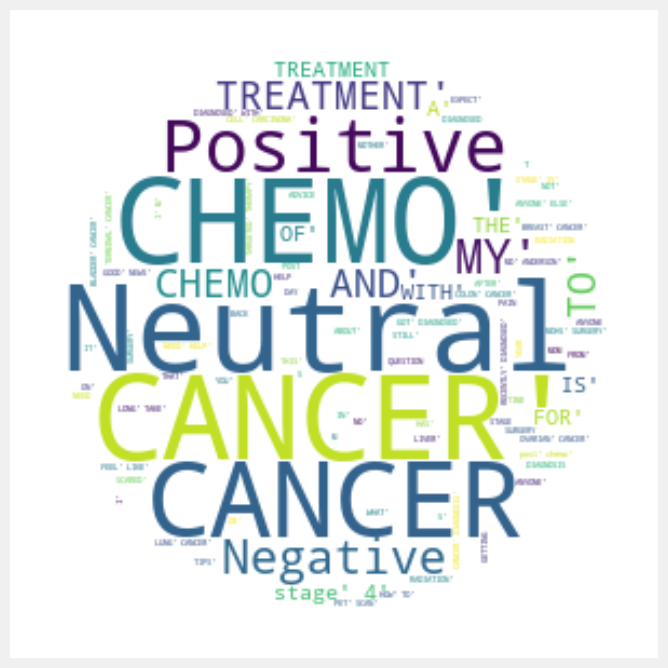

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Concatenate text values from all relevant columns
text = ' '.join(cancer_df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

plt.show()

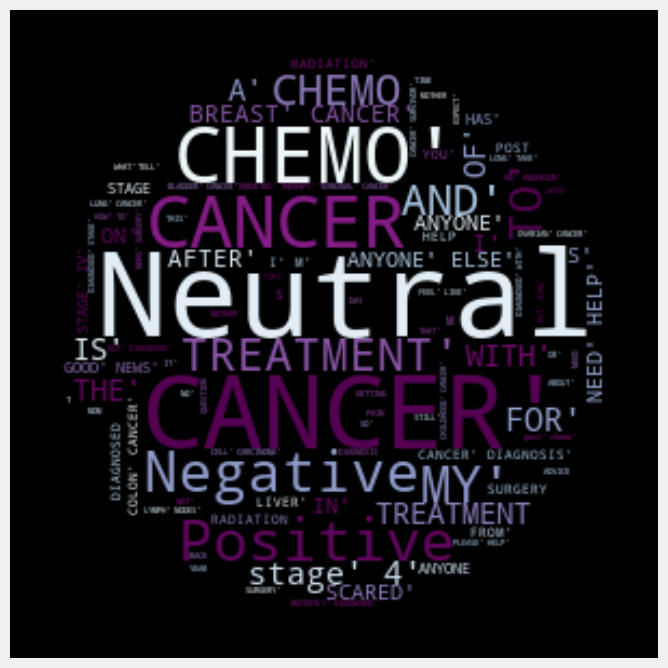

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate text values from all relevant columns
text = ' '.join(cancer_df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask and provided parameters
wc = WordCloud(
    background_color="black",
    mask=mask,
    contour_width=2,
    contour_color="black",
    colormap="BuPu_r",
    width=800,
    height=500
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakkerar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


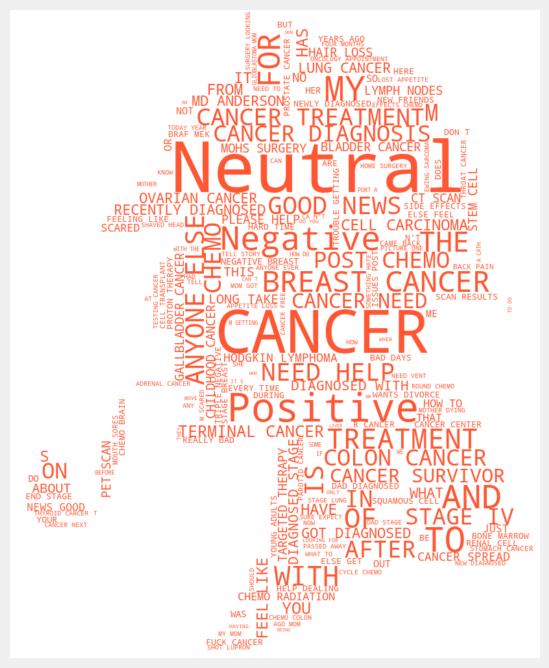

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # Make sure to import the Image module

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Concatenate text values from all relevant columns
text = ' '.join(cancer_df.astype(str).values.flatten())

# Custom mask (replace 'apple_mask' with your actual mask)
apple_mask = np.array(Image.open('C:/Users/shakkerar/Desktop/3.png'))

# Define the color you want for the WordCloud
wordcloud_color = '#FF5733'  # Replace with your desired color code

# Tokenize and remove stopwords
cleaned_tokens = remove_stop(word_tokenize(text))

# Create WordCloud with a custom mask and provided parameters
wc = WordCloud(
    background_color='#FFFFFF',
    mask=apple_mask,
    contour_width=2,
    contour_color='#FFFFFF',
    color_func=lambda *args, **kwargs: wordcloud_color,
    stopwords=['apple']
).generate(' '.join(cleaned_tokens))

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

plt.show()


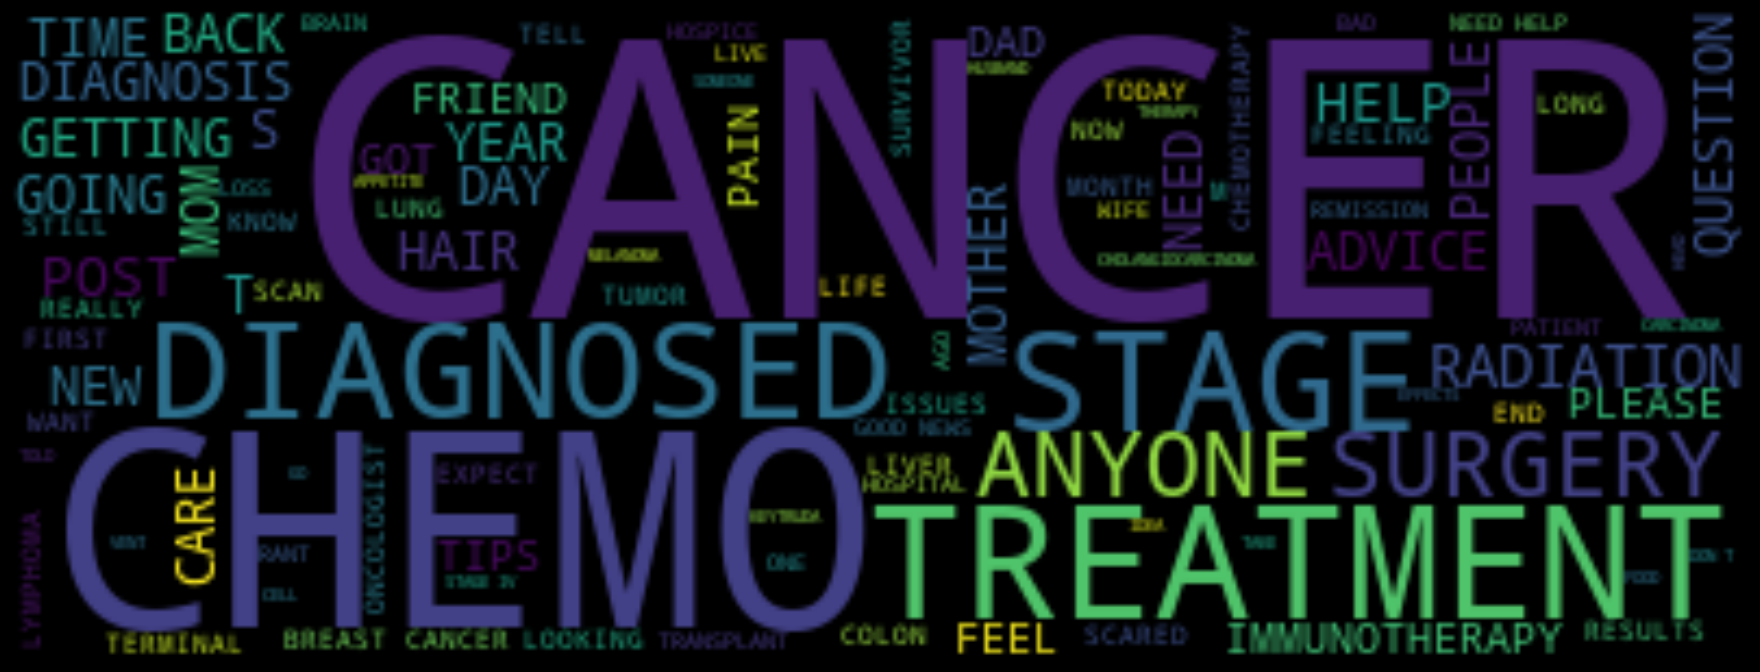

In [52]:
text = ' '.join( [twts for twts in cancer_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=400, height = 150,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Email address

In [55]:
import re

# Define the email address to validate
email = "ramyashakkera@example.com"

# Use regular expression to match the email address pattern
if re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email):
    # If the email address matches the pattern, print "Valid email address"
    print("Valid email address")
else:
    # If the email address does not match the pattern, print "Invalid email address"
    print("Invalid email address")

Valid email address


## URL

In [59]:
import re

# Define the URL to validate
url = "https://www.nftdc.com"

# Use regular expression to match the URL pattern
if re.match(r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$', url):
    # If the URL matches the pattern, print "Valid URL"
    print("Valid URL")
else:
    # If the URL does not match the pattern, print "Invalid URL"
    print("Invalid URL")

Valid URL


## File path

In [58]:
import re

# Define the file path to validate
file_path = "/Users/shakkerar/Downloads/Iris.csv"

# Use regular expression to match the file path pattern
if re.match(r'^\/(?:[^\/\n]+\/)*[^\/\n]+\.[a-zA-Z0-9]+$', file_path):
    # If the file path matches the pattern, print "Valid file path"
    print("Valid file path")
else:
    # If the file path does not match the pattern, print "Invalid file path"
    print("Invalid file path")

Valid file path


## Phone Number

In [60]:
import re

# Define the phone number to validate
phone_number = "+1 (469) 279-3334"

# Use regular expression to match the phone number pattern
if re.match(r'^\+(?:[0-9] ?){6,14}[0-9]$', phone_number):
    # If the phone number matches the pattern, print "Valid phone number"
    print("Valid phone number")
else:
    # If the phone number does not match the pattern, print "Invalid phone number"
    print("Invalid phone number")

Invalid phone number


## Variable Name

In [63]:
import re

# Define the variable name to validate
name= "Robert"

# Use regular expression to match the variable name pattern
if re.match(r'^[a-zA-Z_][a-zA-Z0-9_]*$', name):
    # If the variable name matches the pattern, print "Valid variable name"
    print("Valid variable name")
else:
    # If the variable name does not match the pattern, print "Invalid variable name"
    print("Invalid variable name")

Valid variable name
